In [14]:
import numpy as np
import math
from math import exp
import numpy.linalg as linalg
from sklearn import metrics
import random
from sklearn.datasets import fetch_mldata
import cvxopt
from cvxopt import solvers
import cvxopt.base
from scipy.spatial.distance import cdist
from pylab import *
%matplotlib inline

In [15]:
def data(size,features,deviation):
    w = np.array([0.6,0.6])
    w0 = np.array([0])
    n = size/2
    #Normalized distributed data:
    X = np.append((np.random.randn(n,features)+deviation),(np.random.randn(n,features)-deviation),axis =0)
    #print X
    Y = []
    for i in range(len(X)):
        if (w0 + np.dot(w,X[i])) > 0:
            Y.append([1.0])
        elif (w0 + np.dot(w,X[i])) < 0:
            Y.append([-1.0])
    #print Y
    Y = np.array(Y)
    #lists used to plot the data
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    #separating based on features.
    for i in range(len(Y)):
        if Y[i] == 1:
            X_pos.append(X[i])
            #print X[i]
        elif Y[i] == -1:
            X_neg.append(X[i])
    #print X_pos
    #print X_neg
    
    for j in range(len(X_pos)):
        x_pos.append(X_pos[j][0])
        y_pos.append(X_pos[j][1])
    #print x_pos
    #print y_pos

    for j in range(len(X_neg)):
        x_neg.append(X_neg[j][0])
        y_neg.append(X_neg[j][1])
        
    
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return X,Y

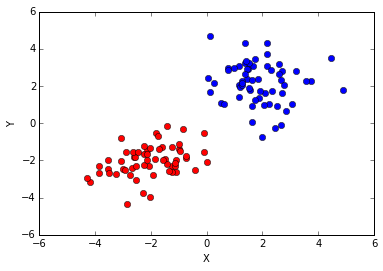

In [16]:
#linearly separable data
X_lin,Y_lin = data(120,2,2.0)

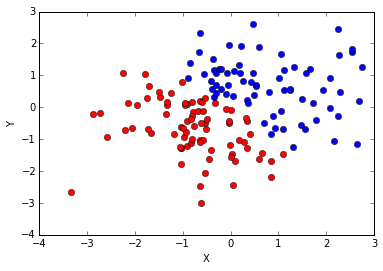

In [17]:
#linearly non separable data
X_non,Y_non = data(150,2,0.5)

In [22]:
def hard(x,y):
    sigma = 0.1
    eud = cdist(x,x,'sqeuclidean')
    ker = np.exp((-1/2)*(eud/sigma**2))
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * ker))
    print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = cvxopt.base.matrix(np.ndarray.tolist(y))
    #b = [1.0]
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1
    

In [36]:
def predict(x,w,w0):
    predict = []
    for i in range(len(x)):
        var1 = np.dot(w,x[i]) + w0
        if var1 < 0:
            predict.append([1])
        else:
            predict.append([-1])
    return np.array(predict)

In [37]:
def accuracy(labels,predicted):
    return metrics.accuracy_score(labels, predicted)

In [38]:
W_lin, W0_lin, SupportVector = hard(X_lin,Y_lin)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -4.1852e+01 -1.0045e+02  6e+01  3e-15  2e+00
 1: -5.1583e+01 -5.3469e+01  2e+00  4e-15  3e-01
 2: -5.4460e+01 -5.4695e+01  2e-01  7e-15  1e-02
 3: -5.4464e+01 -5.4466e+01  2e-03  1e-14  1e-04
 4: -5.4464e+01 -5.4464e+01  2e-05  1e-14  1e-06
 5: -5.4464e+01 -5.4464e+01  2e-07  2e-15  1e-08
Optimal solution found.
[[ 1.3850012   4.32982393]
 [ 2.08753219  1.61837364]
 [ 2.43421028 -0.27265487]
 [ 1.87173594  1.3756597 ]
 [ 1.72060995  1.26829423]
 [ 2.51885237  0.9280538 ]
 [ 4.46464939  3.52213054]
 [ 3.07235957  1.03261415]
 [ 1.66963509  3.07525171]
 [ 2.17553404  3.7210073 ]
 [ 1.3794419   3.21812714]
 [ 1.47400964  2.89541194]
 [ 1.56716937  1.78187262]
 [ 0.2640592   2.15186554]
 [ 3.734084    2.25011973]
 [ 0.52988891  1.0691023 ]
 [ 2.66324858 -0.10830912]
 [ 2.1559289   3.1007167 ]
 [ 1.16484345  1.40071428]
 [ 3.20860681  2.82990592]
 [ 2.34234347  1.73548343]
 [ 2.68405338  2.8211551 ]
 [ 0.7683903

In [39]:
predict_lin = predict(X_lin, W_lin,  W0_lin)

In [40]:
acc = accuracy(Y_lin,predict_lin)
print "Accuracy:", acc

Accuracy: 1.0


In [41]:
W_non, W0_non, SupportVectorNon = hard(X_non,Y_non)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -4.9070e+01 -1.2211e+02  7e+01  9e-16  2e+00
 1: -5.9489e+01 -6.4194e+01  5e+00  1e-15  3e-01
 2: -6.2931e+01 -6.3713e+01  8e-01  4e-15  2e-02
 3: -6.2967e+01 -6.2992e+01  3e-02  4e-15  5e-04
 4: -6.2968e+01 -6.2969e+01  6e-04  2e-14  7e-06
 5: -6.2968e+01 -6.2968e+01  8e-06  2e-14  7e-08
Optimal solution found.
[[ 1.93264854  0.5308969 ]
 [ 2.29848416  0.47135223]
 [-0.09714551  0.41777691]
 [ 1.33310201  1.2616582 ]
 [ 2.54338762  1.72337883]
 [ 2.07230769 -0.02035808]
 [ 0.53706936  0.70236378]
 [ 2.24431719 -0.26377229]
 [-0.07685161  1.08184622]
 [ 0.65286559 -1.41941398]
 [-1.00858528  0.80144192]
 [-0.35518705  1.17629078]
 [ 2.75533904  1.2513318 ]
 [ 0.70883844 -0.50711657]
 [ 1.49290593  0.24935919]
 [-0.84608786  1.39539464]
 [ 1.66973322  1.19038236]
 [-0.90776468  0.1151096 ]
 [ 1.4668642  -0.56631262]
 [-0.6596488   1.73239613]
 [ 0.88345992 -0.27512262]
 [ 0.1847158  -1.01542634]
 [-0.0594767

In [42]:
predict_non = predict(X_non, W_non,  W0_non)

In [43]:
acc_non = accuracy(Y_non,predict_non)
print "Accuracy:", acc_non

Accuracy: 0.1


In [44]:
def plotsupportvector(sv,x,y):
    xsv = []
    ysv = []
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    sv = np.array(sv)
    for i in range(len(sv)):
        xsv.append(sv[0])
        ysv.append(sv[1])
    
    for j in range(len(y)):
        if y[j] == 1:
            X_pos.append(x[j])
            #print X[i]
        elif y[j] == -1:
            X_neg.append(x[j])
    
    for k in range(len(X_pos)):
        x_pos.append(X_pos[k][0])
        y_pos.append(X_pos[k][1])
    
    for l in range(len(X_neg)):
        x_neg.append(X_neg[l][0])
        y_neg.append(X_neg[l][1])
            
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.plot(xsv,ysv,'g^')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

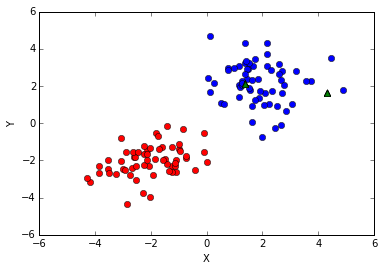

In [45]:
SVplot = plotsupportvector(SupportVector,X_lin,Y_lin)

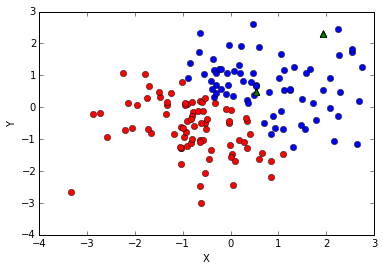

In [46]:
SVplot = plotsupportvector(SupportVectorNon,X_non,Y_non)